# Obtaining PDFs and Fragementation Functions in LHAPDF

### Installation steps for LHAPDF

Assuming that the python3 is installed (for example python3.8 was used here)

1) Download LHAPDF from https://lhapdf.hepforge.org/downloads

or use:

 wget https://lhapdf.hepforge.org/downloads/?f=LHAPDF-6.X.Y.tar.gz -O LHAPDF-6.X.Y.tar.gz
 
 **for example: version 6.3.0**

2) tar xf LHAPDF-6.X.Y.tar.gz

3) cd LHAPDF-6.X.Y

4) ./configure --prefix=/path/for/installation

[The "path" hers is, the location that you want to install. For example: /home/LHAPDF_install]

5) make

6) make install

7) Add the paths in your ~/.bashrc as follows 

* export PATH=LHADIR='/path/for/installation'
* export PYTHONPATH=\\$LHADIR/lib/python3.8/site-packages:\\$PYTHONPATH
* export PATH=\\$LHADIR/bin:\\$PATH
* export LD_LIBRARY_PATH=\\$LHADIR/lib:\\$LD_LIBRARY_PATH

8) Then download the data-sets/grids from https://lhapdf.hepforge.org/pdfsets.html

9) Copy those data-sets/grids .zip files to '/path/of/LHAPDF/installation/share/LHAPDF/
* sudo tar -xvzf name.tar.gz

10) Each of those pdf-set folders contain central values and replicas with some confidence interval (see .info file on each folder for more details)

!! Note !!

If at some point in the above steps you encounter an error such as "usr/bin/env: python: No such file or directory", then run "sudo apt install python-is-python3"

After this you should reconfigure and reinstall LHAPDF.  This will overwrite the python command to be identical to the python3 command, so be careful you have no other programs or software dependent on python pointing to a python2 distribution.


In [3]:
import lhapdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Sample grids for x and z

In [4]:
xinit=1.000000e-04
deltax=1e-3
xdata=np.arange(xinit, 1, deltax)

zinit = 1.000000e-04
deltaz = 1e-3
zdata = np.arange(zinit, 1, deltaz)

### Let's call PDF data sets

In [10]:
PDFdataset = lhapdf.mkPDF("JAM19PDF_proton_nlo")
FF_pion_dataset = "JAM19FF_pion_nlo"
FF_kaon_dataset = "JAM19FF_kaon_nlo"

### Functions to read PDF grids and FF grids

In [12]:
def xFxQ2(dataset,flavor,x,QQ):
    temp_parton_dist_x=[(dataset.xfxQ2(flavor, x[i], QQ)) for i in range(len(x))]
    return temp_parton_dist_x

def zFzQ(dataset,flavor,zz,QQ):
    # Here "0" represents the central values from the girds
    temp_zD1=lhapdf.mkPDF(dataset, 0)
    zD1_vec=[(temp_zD1.xfxQ2(flavor,zz[i],QQ)) for i in range(len(zz))]
    return zD1_vec

### Sample plot for u-quark distribution vs x

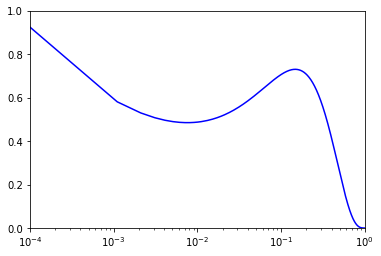

In [13]:
Q2=10
yyu=np.array(xFxQ2(PDFdataset,2,xdata,Q2))
plt.plot(xdata,yyu,color='blue')
plt.xlim(0.0001,1)
plt.ylim(0,1.0)
plt.xscale('log')

### Sample plot for Fragmentation Function of u-quark into a pion

(0.0, 1.0)

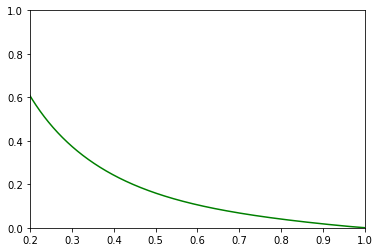

In [14]:
Q2=10
test_FF=zFzQ(FF_pion_dataset,2,zdata,Q2)
plt.plot(zdata,test_FF,color='green')
plt.xlim(0.2,1.0)
plt.ylim(0.0,1.0)